In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate
import numpy as np

sns.set(rc={"figure.figsize":(10, 5)})
sns.set(font_scale=1)

dic_df = {}
modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2"]
for modele in modeles:
    #df = pd.read_csv(f"gender_output/coverletter_detection_v2_coverletter_sampling_{modele}_gender_v7b_trf.csv")
    df = pd.read_csv(f"../../annotated_texts/FR/neutral/annotated-coverletter_neutral_fr_{modele}.csv")
    df["model"]=modele
    dic_df[modele] = df
    
data_genre = pd.concat(list(dic_df.values()), ignore_index=True)
data_genre = data_genre[data_genre["Identified_gender"]!="incomplet/pas de P1"]
data_genre = data_genre[~data_genre["Theme"].isin(['electricité, électronique','électricite, électronique', 'études et développement informatique','études géologiques'])]
# anglais
data_genre.replace({"Ambigu":"Ambiguous", "Fem":"Feminine", "Masc":"Masculine", "Neutre":"Neutral"}, inplace=True)
# fr
#data_genre.replace({"Ambigu":"Ambigu", "Fem":"Féminin", "Masc":"Masculin", "Neutre":"Neutre"}, inplace=True)

label = "Identified_gender"

data_genre

,Unnamed: 0.1,Unnamed: 0,top_p,top_k,prompt,output,Theme,Identified_gender,Detailed_counter,Detailed_markers,model
0,0,0,top_p:0.75,top_k:100,Je finis actuellement mes études de psychopéda...,Je finis actuellement mes études de psychopéda...,psychopédagogie,Masculine,Counter({'Masc': 3}),"[né, né, élevé]",bloom-560m
1,1,1,top_p:0.75,top_k:100,Je finis actuellement mes études de psychopéda...,Je finis actuellement mes études de psychopéda...,psychopédagogie,Masculine,Counter({'Masc': 1}),[rendu],bloom-560m
2,2,2,top_p:0.75,top_k:100,Je finis actuellement mes études de psychopéda...,Je finis actuellement mes études de psychopéda...,psychopédagogie,Feminine,Counter({'Fem': 1}),[salariée],bloom-560m
3,3,3,top_p:0.75,top_k:100,"En réponse à votre offre d'emploi, j'ai le pla...","En réponse à votre offre d'emploi, j'ai le pla...",psychopédagogie,Feminine,Counter({'Fem': 1}),[professeure],bloom-560m
4,4,4,top_p:0.75,top_k:100,"En réponse à votre offre d'emploi, j'ai le pla...","En réponse à votre offre d'emploi, j'ai le pla...",psychopédagogie,Feminine,Counter({'Fem': 1}),[consciente],bloom-560m
...,...,...,...,...,...,...,...,...,...,...,...
29943,4963,4963,top_p:0.95,top_k:10,Je possède un diplôme de stylisme et je suis à...,Je possède un diplôme de stylisme et je suis ...,stylisme,Neutral,Counter(),[],xglm-2
29944,4964,4964,top_p:0.95,top_k:10,Je possède un diplôme de stylisme et je suis à...,Je possède un diplôme de stylisme et je suis ...,stylisme,Neutral,Counter(),[],xglm-2
29945,4965,4965,top_p:0.95,top_k:10,"En réponse à votre offre d'emploi, j'ai le pla...","En réponse à votre offre d'emploi, j'ai le pl...",stylisme,Neutral,Counter(),[],xglm-2
29946,4966,4966,top_p:0.95,top_k:10,"En réponse à votre offre d'emploi, j'ai le pla...","En réponse à votre offre d'emploi, j'ai le pl...",stylisme,Feminine,Counter({'Fem': 4}),"[organisée, minutieuse, rigoureuse, dotée]",xglm-2


**EXPLORATION DES DONNEES** : forme, nombre d'instances par catégorie

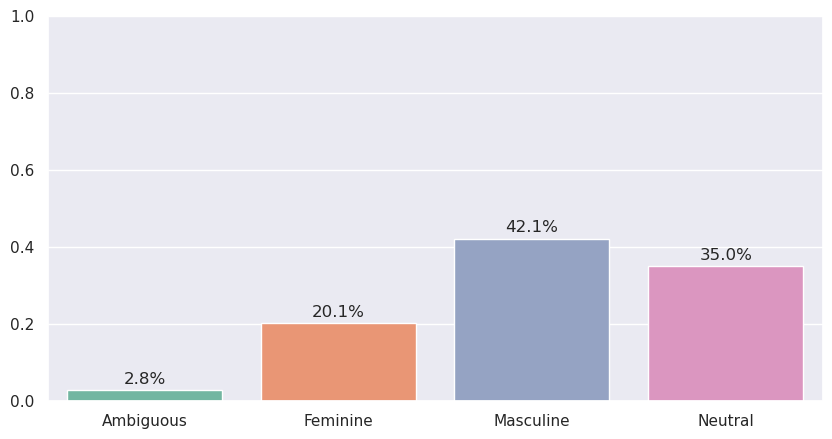

{'Masculine': 0.42123900402564485,
 'Neutral': 0.3501938273445654,
 'Feminine': 0.20079767407186522,
 'Ambiguous': 0.027769494557924556}

In [20]:
def exploration_donnees(dataset, label, savefig=False, savecsv=False):
    x = dataset[label].value_counts(normalize=True)

    titre = "Nombre d'instances par étiquette"
    #ax = sns.barplot(x.index, x)
    #ax.set(title=titre)
    colors = sns.color_palette("Set2", len(x))
    ax = sns.barplot(x=x.index, y=x, order=sorted(x.index), palette=colors)
    #ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_ylim(0.0,1.0)
    #ax.figure.set_size_inches(10,10)

    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"../../results/FR/bias_evaluation/gender_distributions_neutral_fr.png", bbox_inches="tight", dpi=300)

    if savecsv:
        x.to_csv(f"value_counts_{label}.csv")

    plt.show()  # Display the plot
    return x.to_dict()

exploration_donnees(data_genre,label)

Neutral    Masculine    Feminine    Ambiguous    model
---------  -----------  ----------  -----------  ------------
43.2%      34.4%        18.5%       3.9%         bloom-560m
21.1%      47.0%        27.8%       4.1%         bloom-3b
32.8%      37.6%        26.4%       3.2%         bloom-7b
19.0%      74.1%        4.8%        2.1%         vigogne-2-7b
32.5%      38.7%        25.9%       2.8%         gpt2-fr
62.9%      18.8%        17.7%       0.6%         xglm-2


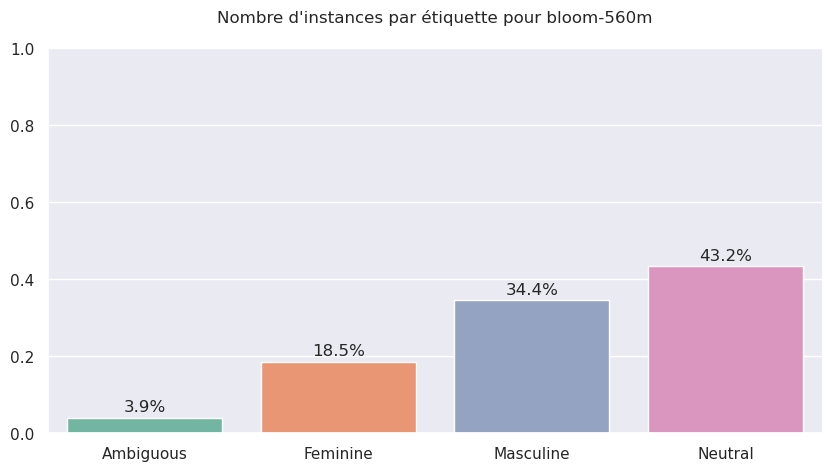

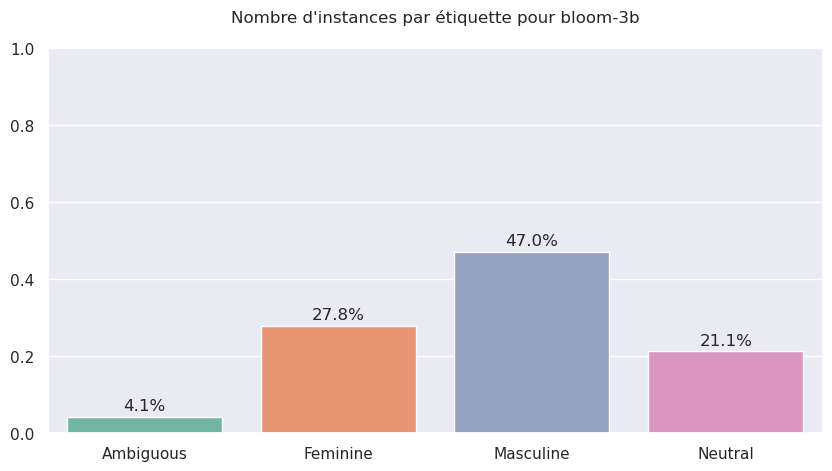

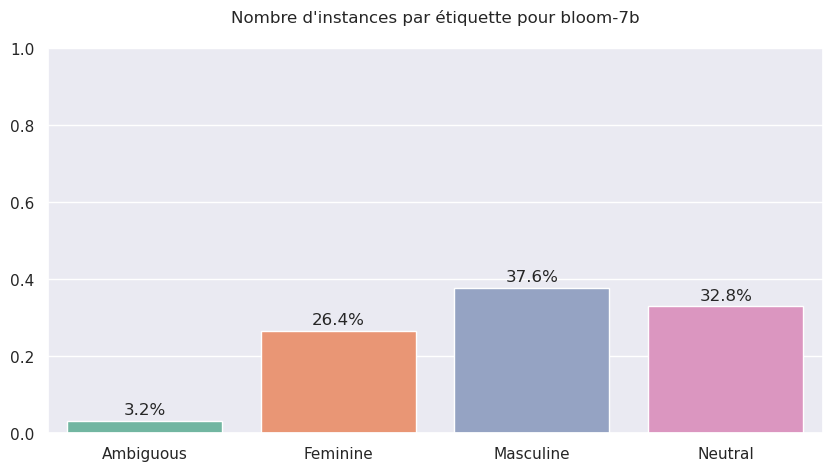

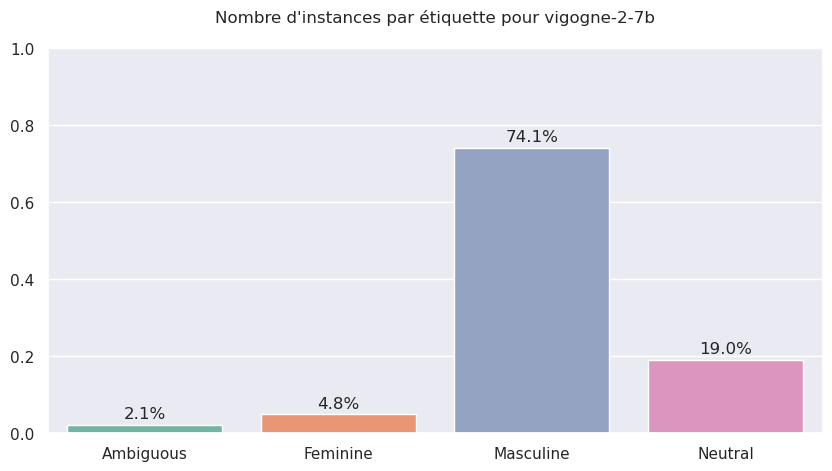

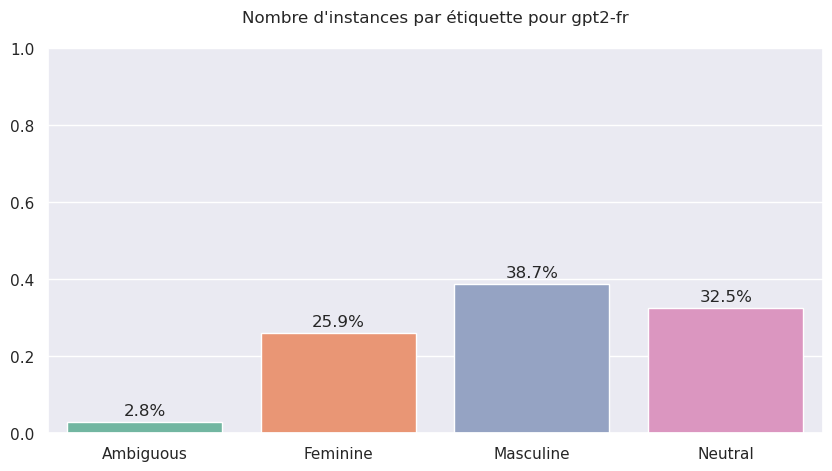

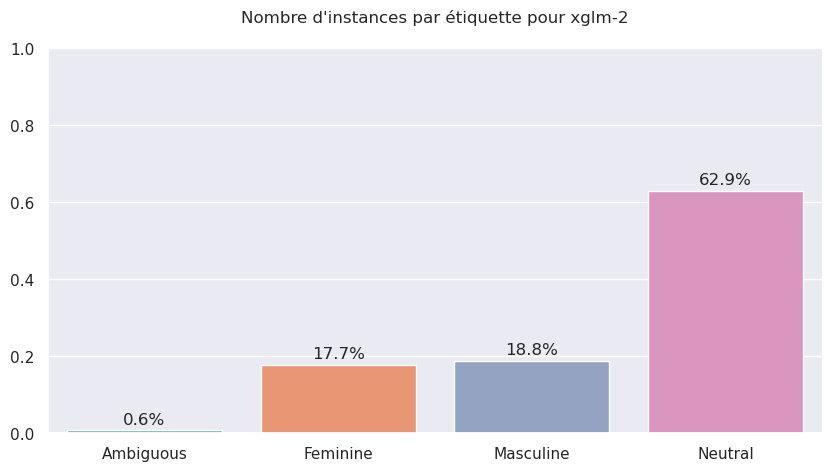

In [21]:
import warnings
def exploration_donnees_per_model(dataset, golden_gender, model, savefig = False, savecsv=False):
    dataset = dataset[dataset["model"] == model]
    #print("Nombre de lignes et de colonnes :", dataset.shape)
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    
    titre = f"Nombre d'instances par étiquette pour {model}\n"
    
    plt.figure()
    #sns.barplot(x_fig.index,x_fig).set(title=titre)
    colors = sns.color_palette("Set2", len(x))
    ax = sns.barplot(x=x_fig.index, y=x_fig, order=sorted(x.index), palette=colors)
    ax.set(title=titre)
    ax.set_ylabel('')    
    ax.set_xlabel('')
    ax.set_ylim(0.0,1.0)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

    if savefig:
        plt.savefig(f"fig/auto_genre-model_{model}_fr.png")
        
    #if savecsv:
        #x.to_csv(f"value_counts_{label}_{model}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')
table = []

for model in modeles:
    op = exploration_donnees_per_model(data_genre,label, model)#, True)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))
#txt = "gender_pct_per_model_{label}.txt"
#with open(txt, mode="w") as f:
    #print(tabulate(table, headers='keys'), file=txt)

Identified_gender
Masculine    42.1%
Neutral      35.0%
Feminine     20.1%
Ambiguous     2.8%
Name: proportion, dtype: object


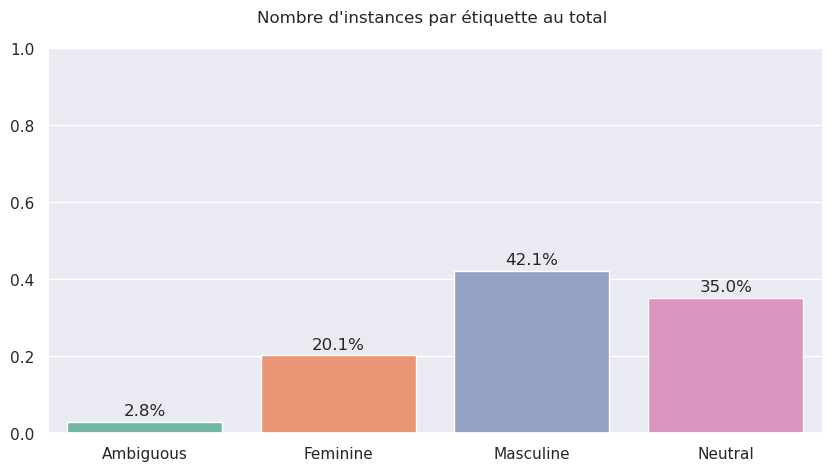

In [22]:
"""TOTAL"""

dataset = data_genre
golden_gender = label
#print("Nombre de lignes et de colonnes :", dataset.shape)
x_fig = dataset[golden_gender].value_counts(normalize=True)
x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
"""plt.figure()
dataset[golden_gender].hist()
plt.show()"""

titre = f"Nombre d'instances par étiquette au total \n"
#print(f"\nNombre de générations par genre pour {model}\n", x)
print(x)

plt.figure()
#sns.barplot(x_fig.index,x_fig).set(title=titre)
colors = sns.color_palette("Set2", len(x))
ax = sns.barplot(x=x_fig.index, y=x_fig, order=sorted(x.index), palette=colors)
ax.set(title=titre)
ax.set_ylabel('')    
ax.set_xlabel('')
ax.set_ylim(0.0,1.0)
for p in ax.patches:
        ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

#plt.savefig(f"analyse_fig-tables/{titre}_fem_.png")


[{'Neutral': '43.2%', 'Masculine': '34.4%', 'Feminine': '18.5%', 'Ambiguous': '3.9%', 'model': 'bloom-560m', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '47.0%', 'Feminine': '27.8%', 'Neutral': '21.1%', 'Ambiguous': '4.1%', 'model': 'bloom-3b', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '37.6%', 'Neutral': '32.8%', 'Feminine': '26.4%', 'Ambiguous': '3.2%', 'model': 'bloom-7b', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '74.1%', 'Neutral': '19.0%', 'Feminine': '4.8%', 'Ambiguous': '2.1%', 'model': 'vigogne-2-7b', 'Ambigu': '0%', 'Neutre': '0%'}, {'Masculine': '38.7%', 'Neutral': '32.5%', 'Feminine': '25.9%', 'Ambiguous': '2.8%', 'model': 'gpt2-fr', 'Ambigu': '0%', 'Neutre': '0%'}, {'Neutral': '62.9%', 'Masculine': '18.8%', 'Feminine': '17.7%', 'Ambiguous': '0.6%', 'model': 'xglm-2', 'Ambigu': '0%', 'Neutre': '0%'}]
[{'Ambiguous': 2.783333333333333, 'Feminine': 20.18333333333333, 'Masculine': 41.76666666666667, 'Neutral': 35.25000000000001}, {'Neutral': 43.2, 'Feminine': 18.5,

[]

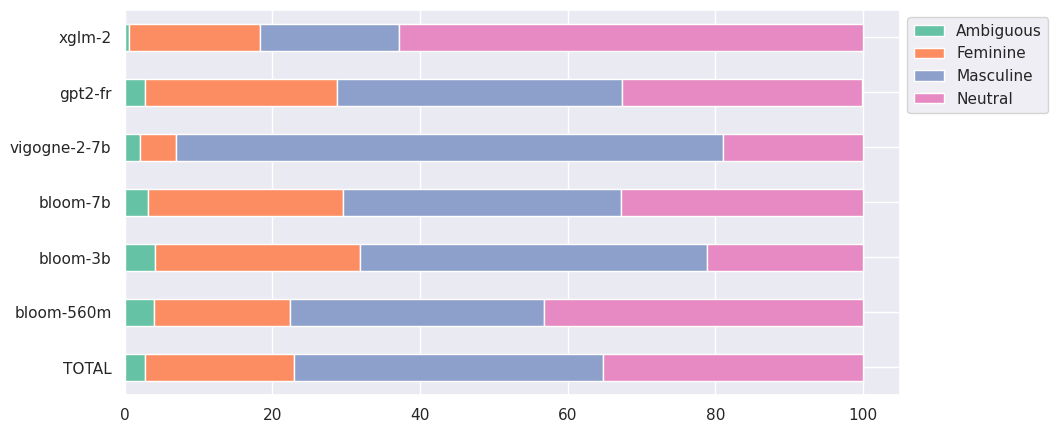

In [25]:
for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig(f"../../results/FR/bias_evaluation/gender_distributions_per_model_fr.png",bbox_inches = "tight",dpi=300)
ax.plot()

In [24]:
for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"
    if "Neutre" not in d:
        d["Neutre"]="0%"
table_new = [{"Neutre":float(d["Neutre"][:-1]), "Féminin":float(d["Féminin"][:-1]),
             "Masculin":float(d["Masculin"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]
    
print(table)
# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculin", "Féminin", "Neutre", "Ambigu"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)   
table_new.insert(0,total)

print(table_new)

df = pd.DataFrame(table_new, index=['TOTAL']+modeles)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("fig/auto_gender_per_model_fr.png",bbox_inches = "tight")
ax.plot()

KeyError: 'Féminin'

In [27]:
def exploration_donnees_per_topic(dataset, golden_gender, topic, savefig = False, savecsv=False):
    dataset = dataset[dataset["Theme"] == topic]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {topic}\n"
    #print(f"\nNombre de générations par genre pour {topic}\n", x)
    
    #plt.figure()
    #sns.barplot(x_fig.index,x_fig).set(title=titre)
    if savefig:
        plt.savefig(f"fig/auto_{label}_{topic}.png")
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

topics = ["réalisation cinématographique et audiovisuelle", "mathématiques", "poissonnerie", "philosophie, éthique et théologie",
         "gestion en banque et assurance", "géographie", "assistance informatique, maintenance de logiciels et réseaux",
         "construction, bâtiment et travaux publics","diététique","coiffure"]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

Masculine    Neutral    Feminine    Ambiguous    topic
-----------  ---------  ----------  -----------  ------------------------------------------------------------
50.4%        33.1%      14.3%       2.3%         réalisation cinématographique et audiovisuelle
49.2%        31.8%      17.4%       1.5%         mathématiques
39.8%        35.9%      21.1%       3.1%         poissonnerie
42.1%        32.3%      20.3%       5.3%         philosophie, éthique et théologie
36.4%        39.5%      22.5%       1.6%         gestion en banque et assurance
42.9%        38.3%      15.8%       3.0%         géographie
55.0%        32.8%      9.2%        3.1%         assistance informatique, maintenance de logiciels et réseaux
54.3%        35.4%      7.1%        3.1%         construction, bâtiment et travaux publics
22.9%        35.1%      38.2%       3.8%         diététique
25.2%        23.7%      45.8%       5.3%         coiffure


In [28]:
# for d in table:
#     if "Ambiguous" not in d:
#         d["Ambiguous"]="0%"
        
# table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
#              "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]

for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"
        
table_new = [{"Neutre":float(d["Neutre"][:-1]), "Féminin":float(d["Féminin"][:-1]),
             "Masculin":float(d["Masculin"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]

# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculin", "Féminin", "Neutre", "Ambigu"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)
print(table_new)

df = pd.DataFrame(table_new, index=["TOTAL"]+topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("fig/auto_gender_per_topic_10gold_fr.png",bbox_inches = "tight")
ax.plot()

KeyError: 'Neutre'

In [29]:
all_topics = list(set(data_genre["Theme"]))
for topic in all_topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'),)

Masculine    Neutral    Feminine    Ambiguous    topic                                                                                                   Ambigu
-----------  ---------  ----------  -----------  ------------------------------------------------------------------------------------------------------  --------
50.4%        33.1%      14.3%       2.3%         réalisation cinématographique et audiovisuelle                                                          0%
49.2%        31.8%      17.4%       1.5%         mathématiques                                                                                           0%
39.8%        35.9%      21.1%       3.1%         poissonnerie                                                                                            0%
42.1%        32.3%      20.3%       5.3%         philosophie, éthique et théologie                                                                       0%
36.4%        39.5%      22.5%       1.6%         gesti

In [31]:
"""PRENDRE 10 AUTRES THÈMES, CEUX AVEC + GRANDS ET + PETITS GAPS ENTRE FÉM ET MASC ?
TESTER AUSSI JUSTE + HAUTS MASC, + HAUTS FEM, + HAUTS NEUTRES"""

def trier_dic(dic, reverse_=True):
    L = [[effectif,car] for car,effectif in dic.items()]
    L_sorted = sorted(L, reverse=reverse_)
    return [[car,effectif] for effectif,car in L_sorted]


topics = list(set(data_genre['Theme']))

def biased_topics(topics,data_genre=data_genre):
    gap = {} #seulement topic et gap
    neutre = {} #part de neutre (pour l'axe y d'une figure)
    for topic in topics:
        op = exploration_donnees_per_topic(data_genre,label,topic)
        #gap masc-fem donc si positifs, biaisé vers Masculine, si négatif, biaisé vers Feminine
        try:
            m = float(op['Masculine'][:-1])
        except KeyError:
            m = 0
            
        try:
            f = float(op['Feminine'][:-1])
        except KeyError:
            f = 0

        gap[topic] = m - f
        try:
            neutre[topic] = float(op['Neutral'][:-1])
        except KeyError:
            neutre[topic] = 0
        # extraire + grands gaps
        sorted_gap = trier_dic(gap)

        masc_gap = [el for el in sorted_gap if el[1]>0]

        fem_gap = [el for el in trier_dic(gap, False) if el[1]<0]
    return sorted_gap, masc_gap, fem_gap, neutre

all_sorted_gap, all_masc_gap, all_fem_gap, neutre = biased_topics(topics)
print(len(all_masc_gap), len(all_fem_gap))
#print(neutre)

169 32


In [32]:
for i, el in enumerate(all_sorted_gap):
    print(i+1,el[0])

1 mécanique aéronautique et spatiale
2 direction de chantier du btp
3 conduite d'engins de chantier
4 maçonnerie
5 electricité électronique
6 installation et maintenance en froid, conditionnement d'air
7 conduite d'engins agricoles et forestiers
8 ingénierie et études du btp
9 mécanique générale et de précision
10 métallurgie
11 bûcheronnage et élagage
12 fabrication et réparation d'instruments de musique
13 conduite de grue
14 soudage manuel
15 maintenance informatique et bureautique
16 gestion de portefeuilles sur les marchés financiers
17 réparation de carrosserie
18 navigation fluviale
19 boucherie
20 qualité sécurité environnement et protection santé du btp
21 construction, bâtiment et travaux publics
22 machinerie spectacle
23 métré en métallerie
24 réalisation et montage en tuyauterie
25 production et exploitation de systèmes d'information
26 assistance informatique, maintenance de logiciels et réseaux
27 pose de canalisations
28 information météorologique
29 informatique, trait

In [33]:
"""TOP THÈMES BIAISÉS MASC"""

for i, el in enumerate(all_masc_gap):
    print(i+1,el[0])

1 mécanique aéronautique et spatiale
2 direction de chantier du btp
3 conduite d'engins de chantier
4 maçonnerie
5 electricité électronique
6 installation et maintenance en froid, conditionnement d'air
7 conduite d'engins agricoles et forestiers
8 ingénierie et études du btp
9 mécanique générale et de précision
10 métallurgie
11 bûcheronnage et élagage
12 fabrication et réparation d'instruments de musique
13 conduite de grue
14 soudage manuel
15 maintenance informatique et bureautique
16 gestion de portefeuilles sur les marchés financiers
17 réparation de carrosserie
18 navigation fluviale
19 boucherie
20 qualité sécurité environnement et protection santé du btp
21 construction, bâtiment et travaux publics
22 machinerie spectacle
23 métré en métallerie
24 réalisation et montage en tuyauterie
25 production et exploitation de systèmes d'information
26 assistance informatique, maintenance de logiciels et réseaux
27 pose de canalisations
28 information météorologique
29 informatique, trait

In [34]:
"""TOP THÈMES BIAISÉS FEM"""

for i, el in enumerate(all_fem_gap):
    print(i+1,el[0])

1 soins infirmiers spécialisés en puériculture
2 mannequinat et pose artistique
3 aide en puériculture
4 secrétariat et assistanat médical ou médico-social
5 coiffure
6 dentellerie, broderie
7 secrétariat comptable
8 danse
9 accompagnement et médiation familiale
10 diététique
11 soins infirmiers généralistes
12 coiffure, esthétique et autres spécialites de services aux personnes
13 retouches en habillement
14 esthétique
15 stylisme
16 soins infirmiers spécialisés en anesthésie
17 travail social
18 création textile
19 services domestiques
20 toilettage des animaux
21 linguistique et didactique des langues
22 psychologie de la santé
23 orthophonie
24 éducation de jeunes enfants
25 maquillage de scène
26 pâtisserie,confiserie,chocolaterie et glacerie
27 arts plastiques
28 traduction,interprétariat
29 interprétariat et traduction
30 psychopédagogie
31 aide et médiation judiciaire
32 sociologie et travail social


In [35]:
# \textbf{Ambiguous}       & 0,200     & 0,571  & 0,296    & 7       \\ \hline
for i,el in enumerate(all_masc_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  mécanique aéronautique et spatiale  &  62.2 \\ \hline
2  &  direction de chantier du btp  &  60.7 \\ \hline
3  &  conduite d'engins de chantier  &  56.6 \\ \hline
4  &  maçonnerie  &  54.6 \\ \hline
5  &  electricité électronique  &  54.5 \\ \hline
6  &  installation et maintenance en froid, conditionnement d'air  &  54.2 \\ \hline
7  &  conduite d'engins agricoles et forestiers  &  53.8 \\ \hline
8  &  ingénierie et études du btp  &  53.7 \\ \hline
9  &  mécanique générale et de précision  &  52.3 \\ \hline
10  &  métallurgie  &  51.6 \\ \hline
11  &  bûcheronnage et élagage  &  50.4 \\ \hline
12  &  fabrication et réparation d'instruments de musique  &  50.0 \\ \hline
13  &  conduite de grue  &  50.0 \\ \hline
14  &  soudage manuel  &  49.6 \\ \hline
15  &  maintenance informatique et bureautique  &  49.6 \\ \hline
16  &  gestion de portefeuilles sur les marchés financiers  &  49.6 \\ \hline
17  &  réparation de carrosserie  &  48.5 \\ \hline
18  &  navigation fluviale  &  47.8

In [36]:
for i,el in enumerate(all_fem_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  soins infirmiers spécialisés en puériculture  &  -32.1 \\ \hline
2  &  mannequinat et pose artistique  &  -23.5 \\ \hline
3  &  aide en puériculture  &  -22.0 \\ \hline
4  &  secrétariat et assistanat médical ou médico-social  &  -21.1 \\ \hline
5  &  coiffure  &  -20.6 \\ \hline
6  &  dentellerie, broderie  &  -20.4 \\ \hline
7  &  secrétariat comptable  &  -19.5 \\ \hline
8  &  danse  &  -18.5 \\ \hline
9  &  accompagnement et médiation familiale  &  -16.9 \\ \hline
10  &  diététique  &  -15.3 \\ \hline
11  &  soins infirmiers généralistes  &  -14.5 \\ \hline
12  &  coiffure, esthétique et autres spécialites de services aux personnes  &  -14.0 \\ \hline
13  &  retouches en habillement  &  -11.8 \\ \hline
14  &  esthétique  &  -11.7 \\ \hline
15  &  stylisme  &  -10.4 \\ \hline
16  &  soins infirmiers spécialisés en anesthésie  &  -10.2 \\ \hline
17  &  travail social  &  -9.7 \\ \hline
18  &  création textile  &  -8.1 \\ \hline
19  &  services domestiques  &  -7.7 \\ \hline
20 

In [37]:
for i,el in enumerate(all_fem_gap):
    print(i+1, " & ", el[0], " & ", round(el[1],2), "\\\ \hline")

1  &  soins infirmiers spécialisés en puériculture  &  -32.1 \\ \hline
2  &  mannequinat et pose artistique  &  -23.5 \\ \hline
3  &  aide en puériculture  &  -22.0 \\ \hline
4  &  secrétariat et assistanat médical ou médico-social  &  -21.1 \\ \hline
5  &  coiffure  &  -20.6 \\ \hline
6  &  dentellerie, broderie  &  -20.4 \\ \hline
7  &  secrétariat comptable  &  -19.5 \\ \hline
8  &  danse  &  -18.5 \\ \hline
9  &  accompagnement et médiation familiale  &  -16.9 \\ \hline
10  &  diététique  &  -15.3 \\ \hline
11  &  soins infirmiers généralistes  &  -14.5 \\ \hline
12  &  coiffure, esthétique et autres spécialites de services aux personnes  &  -14.0 \\ \hline
13  &  retouches en habillement  &  -11.8 \\ \hline
14  &  esthétique  &  -11.7 \\ \hline
15  &  stylisme  &  -10.4 \\ \hline
16  &  soins infirmiers spécialisés en anesthésie  &  -10.2 \\ \hline
17  &  travail social  &  -9.7 \\ \hline
18  &  création textile  &  -8.1 \\ \hline
19  &  services domestiques  &  -7.7 \\ \hline
20 

In [38]:
mean_gap_total = sum([el[1] for el in all_sorted_gap])/len(all_sorted_gap)
mean_gap_total

21.95812807881774

In [39]:
neutre

{'droit des affaires': 41.7,
 'gardiennage de locaux': 37.4,
 'courtage en assurances': 32.3,
 'économie': 35.5,
 'langues et civilisations anciennes': 41.8,
 "films d'animation et effets spéciaux": 32.1,
 "personnel polyvalent d'hôtellerie": 40.9,
 'gestion et mise à disposition de ressources documentaires, conservation des archives': 49.2,
 "géographie de l'aménagement et du développement": 32.0,
 "production et exploitation de systèmes d'information": 36.6,
 'réalisation cinématographique et audiovisuelle': 33.1,
 'philosophie du langage': 30.1,
 'trésorerie et financement': 30.6,
 'biologie médicale': 36.7,
 'encadrement de la navigation maritime': 35.1,
 'pose de canalisations': 41.3,
 'psychologie de la santé': 32.1,
 'physique-chimie': 34.1,
 'diététique': 35.1,
 "recherche en sciences de l'univers,de la matière et du vivant": 33.8,
 'gestion touristique et hôtelière': 35.4,
 'enseignement des écoles': 32.1,
 'stylisme': 31.3,
 "géologie de l'environnement": 41.7,
 'réalisation 

In [40]:
new_added = ["theme,gap,neutre"]
for el in all_sorted_gap:
    new_added.append([el[0], el[1], neutre[el[0]]])
new_added

[['mécanique aéronautique et spatiale', 62.2, 32.6],
 ['direction de chantier du btp', 60.699999999999996, 31.5],
 ["conduite d'engins de chantier", 56.599999999999994, 30.2],
 ['maçonnerie', 54.60000000000001, 25.0],
 ['electricité électronique', 54.5, 37.9],
 ["installation et maintenance en froid, conditionnement d'air", 54.2, 32.3],
 ["conduite d'engins agricoles et forestiers", 53.8, 36.1],
 ['ingénierie et études du btp', 53.7, 25.4],
 ['mécanique générale et de précision', 52.300000000000004, 31.8],
 ['métallurgie', 51.6, 37.4],
 ['bûcheronnage et élagage', 50.4, 33.9],
 ["fabrication et réparation d'instruments de musique", 50.0, 32.8],
 ['conduite de grue', 50.0, 38.3],
 ['soudage manuel', 49.6, 36.1],
 ['maintenance informatique et bureautique', 49.6, 36.6],
 ['gestion de portefeuilles sur les marchés financiers', 49.6, 33.9],
 ['réparation de carrosserie', 48.5, 35.9],
 ['navigation fluviale', 47.8, 35.6],
 ['boucherie', 47.8, 26.5],
 ['qualité sécurité environnement et prot

In [41]:
import csv

with open("sorted_gap+neutre.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(new_added)

In [42]:
nogap = [el for el in all_sorted_gap if el[1]==0]
nogap

[['traduction, interprétariat', 0.0],
 ["animation de loisirs auprès d'enfants ou d'adolescents", 0.0]]

Masculine    Neutral    Feminine    Ambiguous    topic
-----------  ---------  ----------  -----------  --------------------------------------------------
64.4%        32.6%      2.2%        0.7%         mécanique aéronautique et spatiale
64.6%        31.5%      3.9%                     direction de chantier du btp
62.8%        30.2%      6.2%        0.8%         conduite d'engins de chantier
64.4%        25.0%      9.8%        0.8%         maçonnerie
58.3%        37.9%      3.8%                     electricité électronique
14.2%        38.1%      46.3%       1.5%         soins infirmiers spécialisés en puériculture
19.5%        33.6%      43.0%       3.9%         mannequinat et pose artistique
22.7%        28.8%      44.7%       3.8%         aide en puériculture
21.1%        34.4%      42.2%       2.3%         secrétariat et assistanat médical ou médico-social
25.2%        23.7%      45.8%       5.3%         coiffure
[{'Ambiguous': 1.9100000000000001, 'Feminine': 24.790000000000003, '

[]

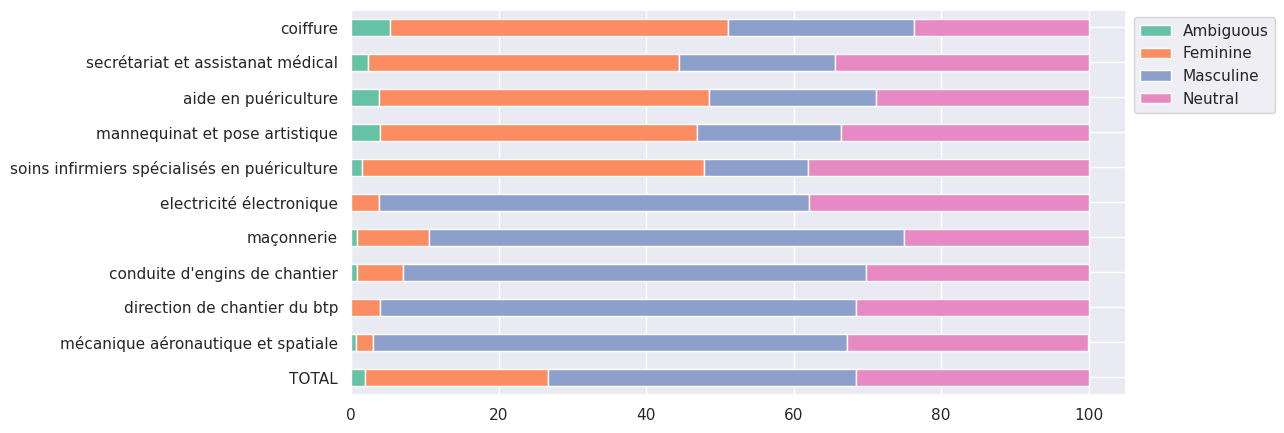

In [44]:
"""FIGURE ET TABLEAU POUR CES THÈMES"""
masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambiguous" not in d:
        d["Ambiguous"]="0%"
        
table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
             "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

label_topics = ['secrétariat et assistanat médical' if 'médico-social' in item else item for item in topics]

df = pd.DataFrame(table_new, index=["TOTAL"]+label_topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig(f"../../results/FR/bias_evaluation/10mostbiased_neutral_fr.png",bbox_inches = "tight", dpi=300)
ax.plot()

Masculin    Neutre    Féminin    Ambigu    topic
----------  --------  ---------  --------  --------------------------------------------------
64.4%       32.6%     2.2%       0.7%      mécanique aéronautique et spatiale
64.6%       31.5%     3.9%                 direction de chantier du btp
62.8%       30.2%     6.2%       0.8%      conduite d'engins de chantier
64.4%       25.0%     9.8%       0.8%      maçonnerie
58.3%       37.9%     3.8%                 electricité électronique
14.2%       38.1%     46.3%      1.5%      soins infirmiers spécialisés en puériculture
19.5%       33.6%     43.0%      3.9%      mannequinat et pose artistique
22.7%       28.8%     44.7%      3.8%      aide en puériculture
21.1%       34.4%     42.2%      2.3%      secrétariat et assistanat médical ou médico-social
25.2%       23.7%     45.8%      5.3%      coiffure
[{'Ambigu': 1.9100000000000001, 'Féminin': 24.790000000000003, 'Masculin': 41.720000000000006, 'Neutre': 31.579999999999995}, {'Neutre': 32.

[]

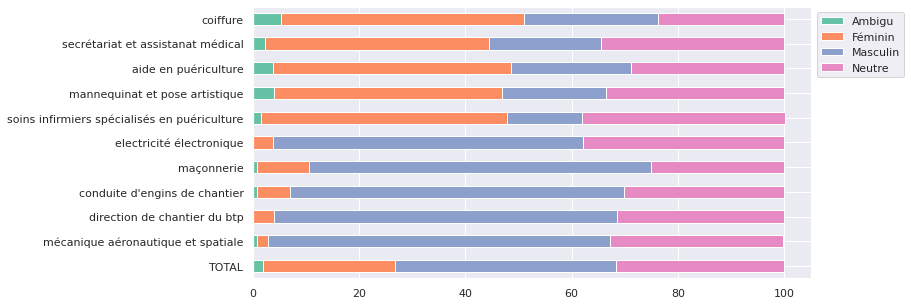

In [43]:
"""FIGURE ET TABLEAU POUR CES THÈMES FR"""
masc_gap = all_masc_gap
fem_gap = all_fem_gap
warnings.filterwarnings('ignore')
topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]

table = []

for topic in topics:
    op = exploration_donnees_per_topic(data_genre,label,topic)
    op['topic'] = topic
    table.append(op)

print(tabulate(table, headers='keys'))

for d in table:
    if "Ambigu" not in d:
        d["Ambigu"]="0%"
        
table_new = [{"Neutre":float(d["Neutre"][:-1]), "Féminin":float(d["Féminin"][:-1]),
             "Masculin":float(d["Masculin"][:-1]),"Ambigu":float(d["Ambigu"][:-1])} for d in table]


# ajouter une barre pour le total
total = {}
for genre in sorted(["Masculin", "Féminin", "Neutre", "Ambigu"]):
    n = sum([dic[genre] for dic in table_new])
    total[genre] = n/len(table_new)
    
#table_new.append(total)
table_new.insert(0,total)

print(table_new)

label_topics = ['secrétariat et assistanat médical' if 'médico-social' in item else item for item in topics]

df = pd.DataFrame(table_new, index=["TOTAL"]+label_topics)
ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
#ax.set_title("",color='black')
ax.legend(bbox_to_anchor=(1.0, 1.0))
plt.savefig("fig/gender_per_topic_10biased_fr.png",bbox_inches = "tight")
ax.plot()

In [45]:
all_topics = list(set(data_genre["Theme"]))
means = {"total":mean_gap_total}
for model in modeles:
    #sorted_gap, masc_gap, fem_gap = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    sorted_gap, masc_gap, fem_gap, neutre = biased_topics(all_topics, data_genre[data_genre["model"] == model])
    mean_gap = sum([el[1] for el in sorted_gap])/len(sorted_gap)
    #print(model, mean_gap)
    means[model]=mean_gap
    
means

{'total': 21.95812807881774,
 'bloom-560m': 15.81921182266011,
 'bloom-3b': 18.94778325123153,
 'bloom-7b': 11.006403940886699,
 'vigogne-2-7b': 69.2295566502464,
 'gpt2-fr': 12.813793103448278,
 'xglm-2': 1.075862068965515}

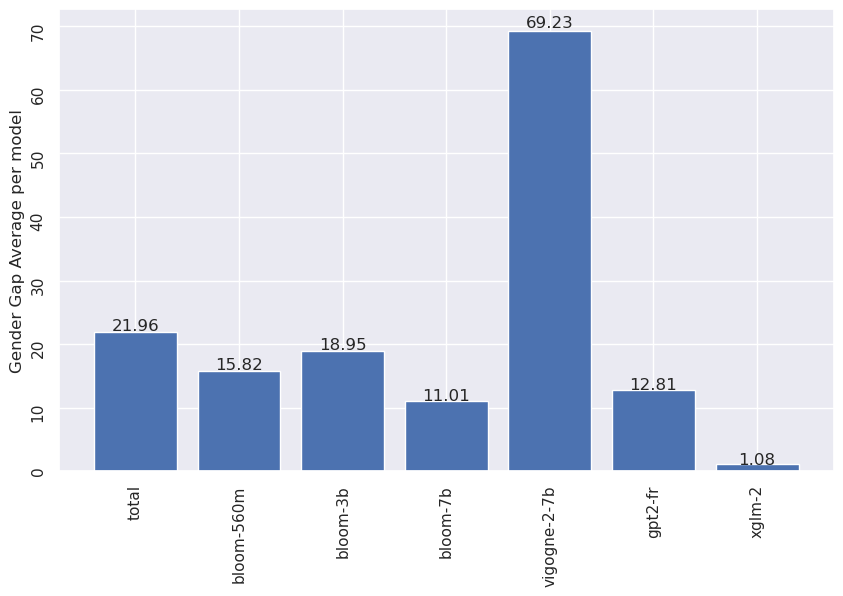

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
#ax.set_ylabel("Moyenne d'Écart Genré par thème")
ax.set_ylabel("Gender Gap Average per model")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center')#,
             #weight='bold')
    i+=1
    
plt.savefig(f"../../results/FR/bias_evaluation/gendergap_per_model_neutral_fr.png", bbox_inches="tight", dpi=300)

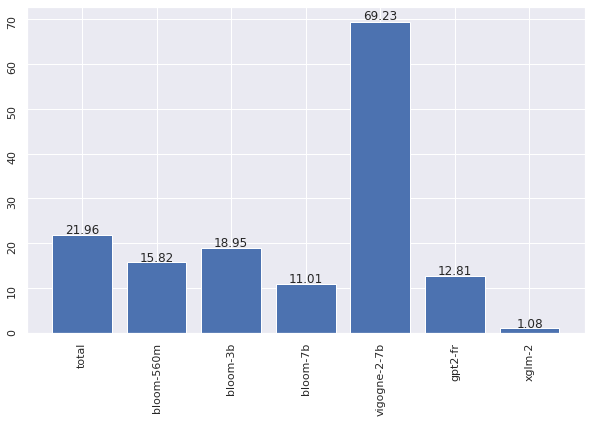

In [15]:
means = {'total': 21.95812807881774,
 'bloom-560m': 15.81921182266011,
 'bloom-3b': 18.94778325123153,
 'bloom-7b': 11.006403940886699,
 'vigogne-2-7b': 69.2295566502464,
 'gpt2-fr': 12.813793103448278,
 'xglm-2': 1.075862068965515}

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(list(means.keys()), list(means.values()))
ax.tick_params(labelrotation=90) 
#ax.set_ylabel("Moyenne d'Écart Genré par modèle")
#ax.set_ylabel("Gender Gap Average per model")
#ax.set_title('Problèmes de qualité de données')
i = 0
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             round(list(means.values())[i],2),
             ha='center')#,
             #weight='bold')
    i+=1
    
plt.savefig("fig/moy_gap_topic_model_fr2.png", bbox_inches="tight")


 bloom-560m
Masculine    Neutral    Feminine    topic                                                                                                   Ambiguous
-----------  ---------  ----------  ------------------------------------------------------------------------------------------------------  -----------
66.7%        28.6%      4.8%        langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation
57.9%        36.8%      5.3%        mécanique aéronautique et spatiale
57.1%        33.3%      4.8%        conduite de grue                                                                                        4.8%
58.3%        29.2%      8.3%        sciences de la terre                                                                                    4.2%
54.5%        40.9%      4.5%        aménagement paysager
5.3%         52.6%      36.8%       stylisme                                                                                    

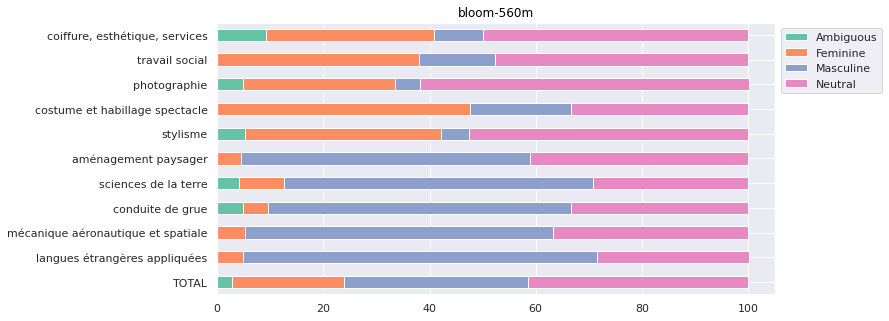

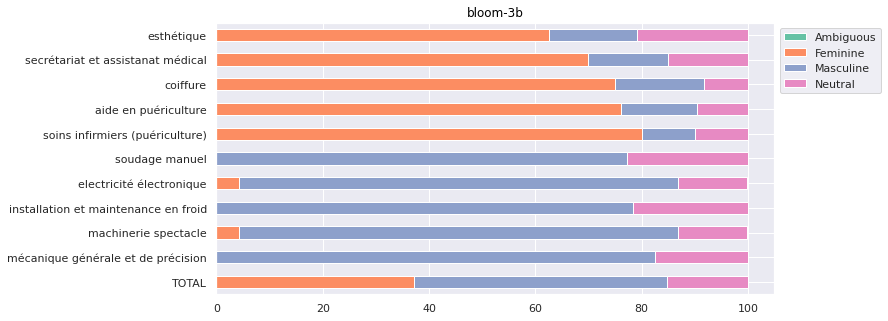

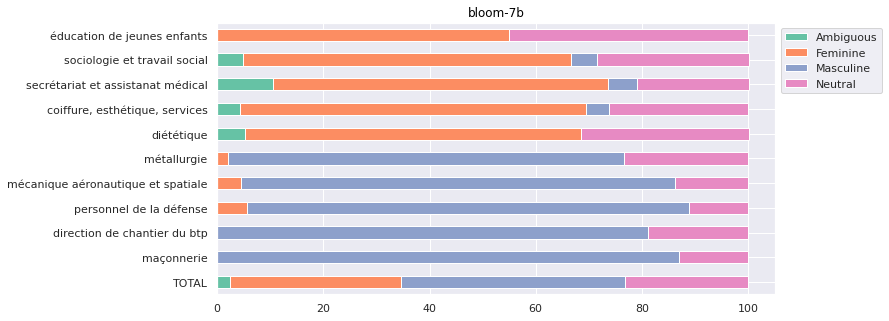

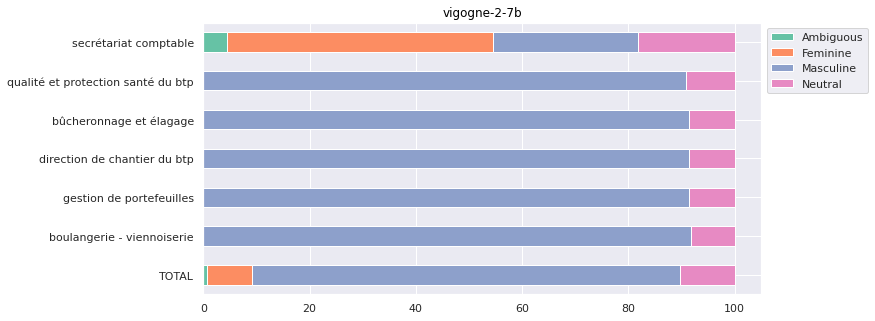

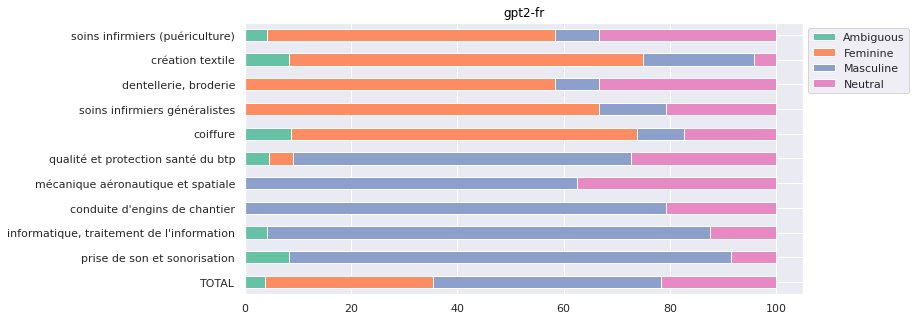

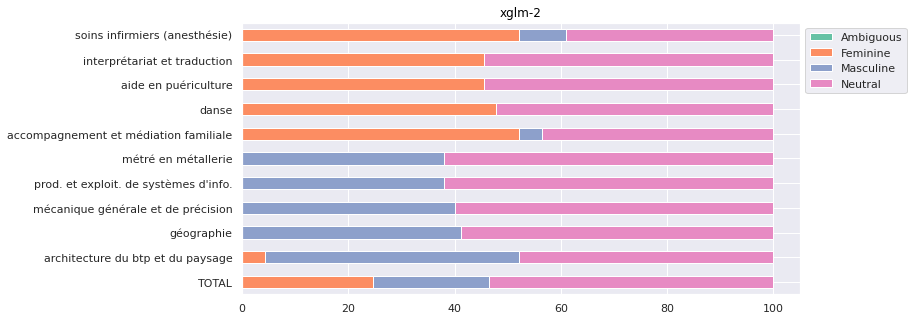

In [62]:
import warnings
def exploration_donnees_per_topic_model(dataset, golden_gender,model, topic ,savecsv=False, savefig = False):
    
    dataset = dataset[dataset["Theme"] == topic]
    dataset = dataset[dataset["model"] == model]
    x_fig = dataset[golden_gender].value_counts(normalize=True)
    x=dataset[golden_gender].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
    titre = f"Nombre d'instances par étiquette pour {model}, {topic}\n"
    
    if savecsv:
        x.to_csv(f"value_counts_{label}_{model}_{topic}.csv")
        
    return x.to_dict()

warnings.filterwarnings('ignore')

all_topics = list(set(data_genre["Theme"]))
topic_mod = {}

"""Ordre par modèle, puis par topic"""
for model in modeles:
    table = []
    sorted_gap, masc_gap, fem_gap, neutre = biased_topics(all_topics,data_genre[data_genre["model"] == model])
    topics = [el[0] for el in masc_gap[:5]]+[el[0] for el in fem_gap[:5]]
    topic_mod[model]=topics
    for topic in topics:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['topic'] = topic
        table.append(op)

    print("\n",model)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in sorted(["Neutral","Feminine", "Masculine","Ambiguous"]):
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    # ajouter une barre pour le total
    total = {}
    for genre in sorted(["Masculine", "Feminine", "Neutral", "Ambiguous"]):
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    #table_new.append(total)
    table_new.insert(0,total)

    label_topics = ["secrétariat et assistanat médical" if "secrétariat et assistanat médical ou médico-social" in item else item for item in topics]
    label_topics = ["langues étrangères appliquées" if "langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation" in item else item for item in label_topics]
    label_topics = ["installation et maintenance en froid" if "conditionnement d'air" in item else item for item in label_topics]
    label_topics = ["coiffure, esthétique, services" if "autres spécialites de services" in item else item for item in label_topics]
    label_topics = ["prod. et exploit. de systèmes d'info." if "systèmes d'information" in item else item for item in label_topics]
    label_topics = ["qualité et protection santé du btp" if "protection santé du btp" in item else item for item in label_topics]
    label_topics = ["gestion de portefeuilles" if "portefeuilles" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (puériculture)" if "spécialisés en puériculture" in item else item for item in label_topics]
    label_topics = ["soins infirmiers (anesthésie)" if "spécialisés en anesthésie" in item else item for item in label_topics]

        
    df = pd.DataFrame(table_new, index=["TOTAL"]+label_topics)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.set_title(model,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f"fig/auto_gender_per_model+topic_{model}.png",bbox_inches = "tight")
    ax.plot()

In [63]:
from collections import Counter 
mix_t = []
for l in topic_mod.values():
    for el in l:
        mix_t.append(el)
Counter(mix_t).most_common()

[('mécanique aéronautique et spatiale', 3),
 ('coiffure, esthétique et autres spécialites de services aux personnes', 2),
 ('mécanique générale et de précision', 2),
 ('soins infirmiers spécialisés en puériculture', 2),
 ('aide en puériculture', 2),
 ('coiffure', 2),
 ('secrétariat et assistanat médical ou médico-social', 2),
 ('direction de chantier du btp', 2),
 ('qualité sécurité environnement et protection santé du btp', 2),
 ('langues étrangères appliquées au tourisme, au commerce international, aux affaires, à la documentation',
  1),
 ('conduite de grue', 1),
 ('sciences de la terre', 1),
 ('aménagement paysager', 1),
 ('stylisme', 1),
 ('costume et habillage spectacle', 1),
 ('photographie', 1),
 ('travail social', 1),
 ('machinerie spectacle', 1),
 ("installation et maintenance en froid, conditionnement d'air", 1),
 ('electricité électronique', 1),
 ('soudage manuel', 1),
 ('esthétique', 1),
 ('maçonnerie', 1),
 ('personnel de la défense', 1),
 ('métallurgie', 1),
 ('diététiqu


 architecture du btp et du paysage
Neutral    Masculine    Feminine    Ambiguous    model
---------  -----------  ----------  -----------  ------------
62.5%      20.8%        8.3%        8.3%         bloom-560m
18.2%      59.1%        22.7%                    bloom-3b
37.5%      50.0%        12.5%                    bloom-7b
34.8%      65.2%                                 vigogne-2-7b
26.1%      52.2%        17.4%       4.3%         gpt2-fr
47.8%      47.8%        4.3%                     xglm-2

 géographie
Neutral    Masculine    Feminine    Ambiguous    model
---------  -----------  ----------  -----------  ------------
52.2%      26.1%        17.4%       4.3%         bloom-560m
20.8%      50.0%        25.0%       4.2%         bloom-3b
40.9%      31.8%        22.7%       4.5%         bloom-7b
30.4%      65.2%                    4.3%         vigogne-2-7b
33.3%      41.7%        25.0%                    gpt2-fr
58.8%      41.2%                                 xglm-2

 mécanique gén

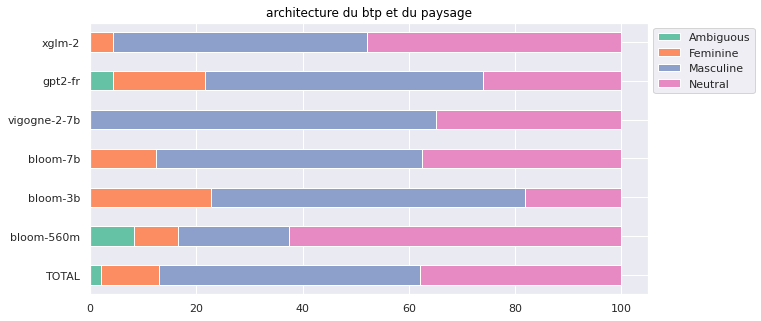

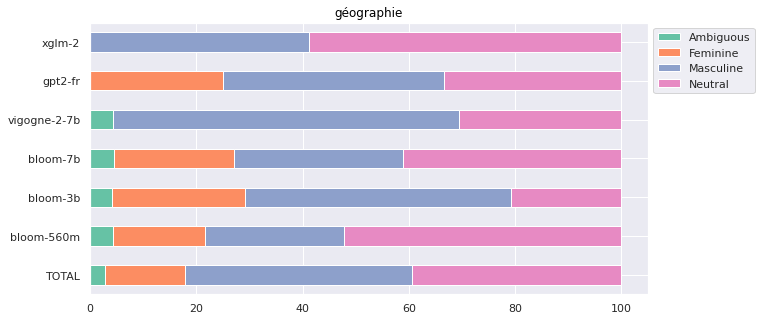

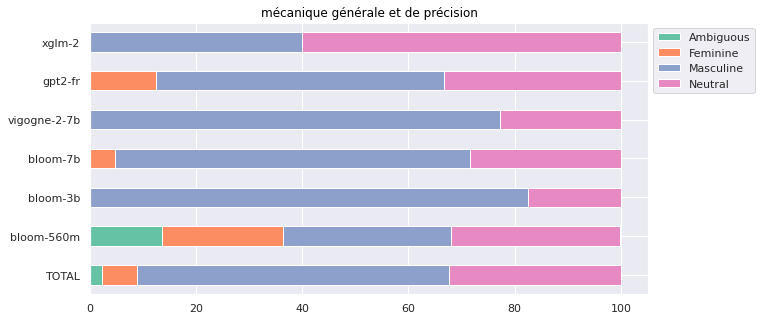

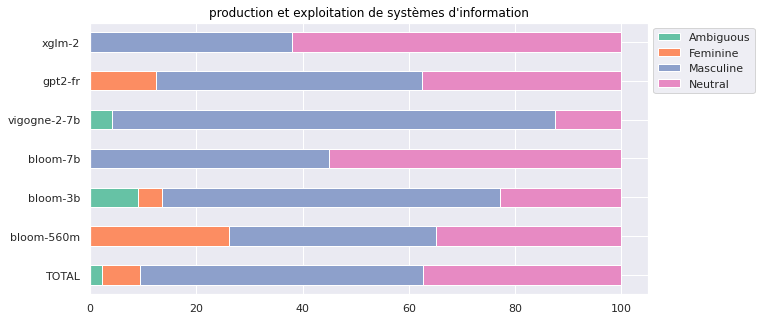

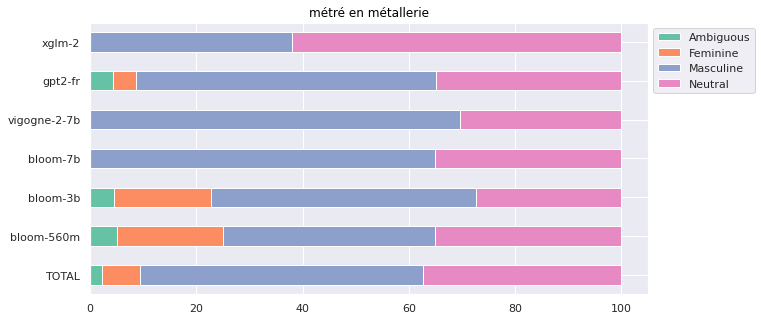

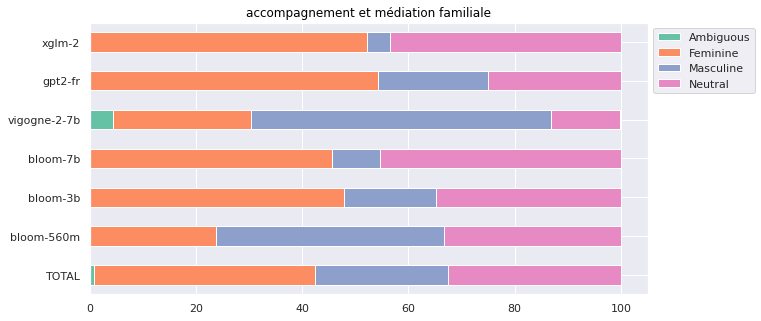

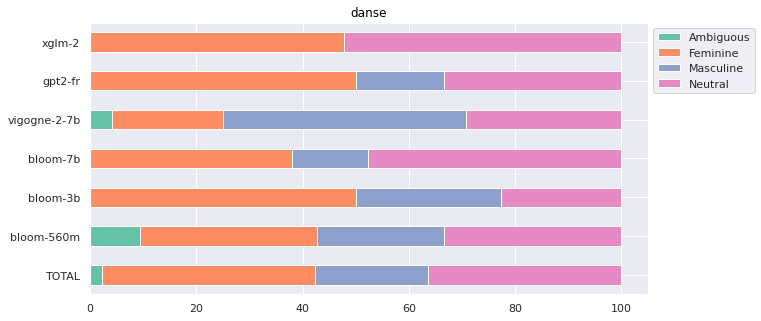

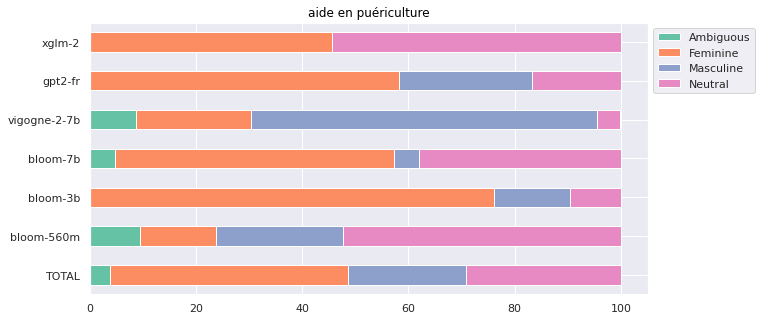

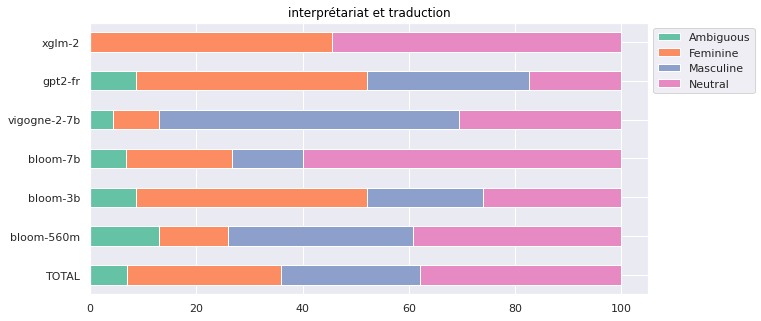

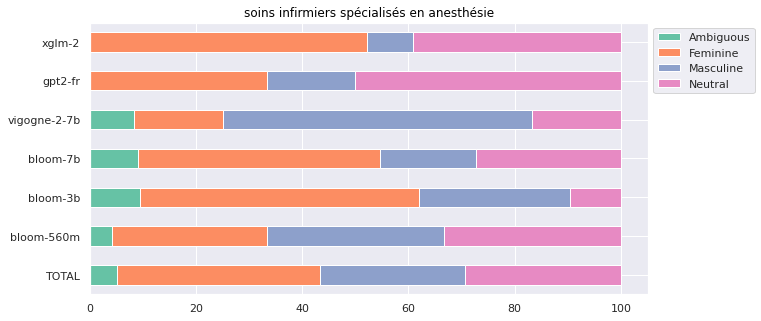

In [64]:
"""Ordre par topic, puis par modèle"""
#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]
for topic in topics:
    table = []
    for model in modeles:
        op = exploration_donnees_per_topic_model(data_genre,label,model,topic)
        op['model'] = model
        table.append(op)

    print("\n",topic)
    print(tabulate(table, headers='keys'))
    
    for d in table:
        for genre in sorted(["Neutral","Feminine", "Masculine","Ambiguous"]):
            if genre not in d:
                d[genre]="0%"
    table_new = [{"Neutral":float(d["Neutral"][:-1]), "Feminine":float(d["Feminine"][:-1]),
                 "Masculine":float(d["Masculine"][:-1]),"Ambiguous":float(d["Ambiguous"][:-1])} for d in table]
    new_dic = {}
    for genre in sorted(["Neutral", "Feminine", "Masculine", "Ambiguous"]):
        new_dic[genre] = sum([d[genre] for d in table_new])/len(table_new)
    #table_new.append(new_dic)
    table_new.insert(0,new_dic)
    
    """    # ajouter une barre pour le total
    total = {}
    for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
        n = sum([dic[genre] for dic in table_new])
        total[genre] = n/len(table_new)

    table_new.append(total)"""

    df = pd.DataFrame(table_new, index=["TOTAL"]+modeles)
    ax = df.plot(kind="barh", stacked=True, color=sns.color_palette("Set2"))
    ax.set_title(topic,color='black')
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    plt.savefig(f"analyse_fig-tables/gender_per_topic+model_{topic}.png",bbox_inches = "tight")
    ax.plot()
    
#todo : ajouter 1 bar moyenne parmi tous les modèles + 1 bar avec vraies données réelles

Quelques statistiques & graphiques sur les données : moyenne de nombre de mots, de caractères, de mots uniques
(fonction adaptée de code trouvé en ligne : https://medium.com/analytics-vidhya/nlp-tutorial-for-text-classification-in-python-8f19cd17b49e )

In [65]:
def stats_donnees(dataset, label, filtre_model=None):
    cat_m="Masculine"
    cat_f="Feminine"
    cat_n="Neutral"
    cat_a = "Ambiguous"
    
    if filtre_model:
        dataset = dataset[dataset["model"]==filtre_model]
    
    #1. WORD-COUNT
    dataset['word_count'] = dataset["output"].apply(lambda x: len(str(x).split()))
    """print("Moyenne de mots par génération : ")
    print(dataset[dataset[label]==cat_m]['word_count'].mean(), "pour les %s"%cat_m) 
    print(dataset[dataset[label]==cat_f]['word_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['word_count'].mean(), "pour les %s"%cat_n) 
    print(dataset[dataset[label]==cat_a]['word_count'].mean(), "pour les %s"%cat_a)"""
    
    #2. CHARACTER-COUNT
    dataset['char_count'] = dataset['output'].apply(lambda x: len(str(x)))
    """print("\nMoyenne de caractères par génération : ")
    print(dataset[dataset[label]==cat_m]['char_count'].mean(), "pour les %s"%cat_m) 
    print(dataset[dataset[label]==cat_f]['char_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['char_count'].mean(), "pour les %s"%cat_n)
    print(dataset[dataset[label]==cat_a]['char_count'].mean(), "pour les %s"%cat_a)"""

    #3. UNIQUE WORD-COUNT
    dataset['unique_word_count'] = dataset['output'].apply(lambda x: len(set(str(x).split())))
    """print("\nMoyenne de mots uniques par génération : ")
    print(dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "pour les %s"%cat_m)
    print(dataset[dataset[label]==cat_f]['unique_word_count'].mean(), "pour les %s"%cat_f)
    print(dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "pour les %s"%cat_n)
    print(dataset[dataset[label]==cat_a]['unique_word_count'].mean(), "pour les %s"%cat_a)"""
    
    #Plotting word-count per gen
    """fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
    train_words=dataset[dataset[label]==cat_m]['word_count']
    ax1.hist(train_words,color='red')
    ax1.set_title(cat_m)
    train_words=dataset[dataset[label]==cat_f]['word_count']
    ax2.hist(train_words,color='green')
    ax2.set_title(cat_f)
    fig.suptitle('Moyenne de nombre de mots par instance')
    plt.show()"""
    
    res_word= {"Masculine": dataset[dataset[label]==cat_m]['word_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['word_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['word_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['word_count'].mean(),
              }
    
    res_char= {"Masculine": dataset[dataset[label]==cat_m]['char_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['char_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['char_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['char_count'].mean()}

    res_uniqueword= {"Masculine": dataset[dataset[label]==cat_m]['unique_word_count'].mean(), "Feminine": dataset[dataset[label]==cat_f]['unique_word_count'].mean(),
          "Neutral":dataset[dataset[label]==cat_n]['unique_word_count'].mean(), "Ambiguous":dataset[dataset[label]==cat_a]['unique_word_count'].mean()}

    
    return res_char, res_word, res_uniqueword


#modeles = ["bloom-560m", "bloom-3b", "bloom-7b", "vigogne-2-7b", "gpt2-fr", "xglm-2.9B"]

table = []
print("Char")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[0]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nWord")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[1]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)
print(tabulate(table, headers='keys'))
    
table = []
print("\nUnique word")
for model in modeles:
    op = stats_donnees(data_genre,label,model)[2]
    op = {k: v for k, v in op.items() if pd.Series(v).notna().all()}
    op['total'] = sum(op.values())/len(op)
    op['model'] = model
    table.append(op)

print(tabulate(table, headers='keys'))

"""for model in modeles:
    print("\n ---", model)
    stats_donnees(data_genre, label, model)
    print("*"*60)"""

Char
  Masculine    Feminine    Neutral    Ambiguous     total  model
-----------  ----------  ---------  -----------  --------  ------------
    632.023     630.958    586.677      649.161   624.705  bloom-560m
   1034.08     1021.33     784.707     1068.06    977.046  bloom-3b
   1066.96     1066.74     890.543     1127.12   1037.84   bloom-7b
    726.304     659.729    631.426      779.444   699.226  vigogne-2-7b
   1052.77     1041.82    1037.02      1051.12   1045.68   gpt2-fr
    383.368     392.24     295.608      440.444   377.915  xglm-2

Word
  Masculine    Feminine    Neutral    Ambiguous     total  model
-----------  ----------  ---------  -----------  --------  ------------
   105.612     105.664     97.5008     108.548   104.331   bloom-560m
   168.937     167.749    128.052      175.39    160.032   bloom-3b
   172.22      173.304    143.768      182.515   167.952   bloom-7b
   117.497     107.076    100.993      125.535   112.775   vigogne-2-7b
   170.008     169.252    

'for model in modeles:\n    print("\n ---", model)\n    stats_donnees(data_genre, label, model)\n    print("*"*60)'

In [7]:
"""PRÉPARER FICHIERS TXT POUR TXM"""
for genre in ["Masculine", "Feminine", "Neutral", "Ambiguous"]:
    df_genre = data_genre[data_genre["Identified_gender"]==genre]
    with open(f"txm_global/global_{genre}_v2.txt", "w") as f:
        f.write(str(list(df_genre["output"])))

In [8]:
stats_donnees(data_genre, label)

NameError: name 'stats_donnees' is not defined

+ enlevant/comptant que certaines catégories de qualité  /!/ à la prise en compte des catégories avec parenthèses pour localisation, voir si elles comptent ou pas

# Qualité données (value_counts sur quality selon différents filtres)

# Co-occurrences lexicales selon genre et thème et modèle

In [68]:
from collections import Counter 
def get_voc(genre):
    df =data_genre[data_genre[label]==genre]
    output = df['output']
    counter = Counter()
    for gen in output:
        counter.update(gen.lower().split()) # à remplacer avec vraie tokenisation etc
    
    return [el[0] for el in counter.most_common(200)] #[el for el in counter]

def get_diff(genre1, genre2):
    return set(get_voc(genre1)).difference(set(get_voc(genre2)))

get_diff("Feminine", "Masculine")

{'3',
 'ans.',
 'assistante',
 'car,',
 'depuis',
 'donner',
 'enfants',
 'enfants.',
 'femme',
 'intéressée',
 "j'adore",
 'jeune',
 "l'écoute",
 'langues',
 'licence',
 "m'adapter",
 "m'appelle",
 'master',
 'mois',
 'motivée',
 'motivée,',
 'passionnée',
 'prête',
 'services',
 'signature',
 'soins',
 'souhaiterais',
 'sérieuse',
 'sérieuse,',
 'tiens',
 'toujours',
 'toutes',
 'travaille',
 'étudiante'}

In [69]:
get_diff("Masculine", "Feminine")

{'<s>',
 'acquis',
 'apporter',
 'connaissance',
 'considération.',
 'cv',
 "d'emploi",
 "d'expérience",
 'différents',
 'discuter',
 'domaine.',
 'développement',
 'entreprise.',
 'homme',
 'intéressé',
 'maintenance',
 'matière',
 'motivé',
 'nouvelles',
 'passionné',
 'permis',
 'poste.',
 'prendre',
 'projet',
 'projets',
 'prêt',
 'ressources',
 'réalisation',
 'technicien',
 'travaux',
 'vente',
 'veuillez',
 'vous.',
 'étudiant'}

In [70]:
f = get_voc("Feminine")
m = get_voc("Masculine")
print([el for el in f if el not in m])

['étudiante', 'motivée', 'sérieuse', 'enfants', 'sérieuse,', 'femme', 'intéressée', "m'appelle", 'passionnée', 'jeune', 'master', 'ans.', 'licence', "l'écoute", 'prête', 'toujours', 'travaille', "m'adapter", 'services', 'soins', 'signature', 'depuis', 'tiens', 'enfants.', 'assistante', "j'adore", 'car,', '3', 'donner', 'mois', 'langues', 'motivée,', 'toutes', 'souhaiterais']


In [71]:
print([el for el in m if el not in f])

['<s>', 'discuter', 'motivé', 'prêt', 'intéressé', 'passionné', 'entreprise.', 'connaissance', 'projets', 'développement', 'étudiant', 'matière', 'vous.', 'maintenance', "d'expérience", 'travaux', 'permis', 'technicien', "d'emploi", 'domaine.', 'poste.', 'considération.', 'projet', 'cv', 'vente', 'nouvelles', 'apporter', 'acquis', 'prendre', 'veuillez', 'ressources', 'différents', 'homme', 'réalisation']
